In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
% precision 3
% matplotlib inline

# ベルヌーイ分布

ベルヌーイ分布はscipy.stats.bernoulliを使う。</br>
ベルヌーイ分布は値が0か1の離散的な確率分布で確率質量分布は下記のような数式で表される。</br>
f(x|p)=px(1−p)1−xforx∈0,1M</br>
確率質量分布</br>

ベルヌーイ分布は離散的な確率分布なので確率密度分布ではなく確率質量分布になりそれに伴って使う関数名もpmfになる。</br>
scipy.stats.bernoulli.pmf(x,p)</br>
xには0か1の値を、pには1の時の確率を指定する。</br>
ベルヌーイ分布の定義域は0,1なのでそれ以外の区間ではpmfが0になる。</br>


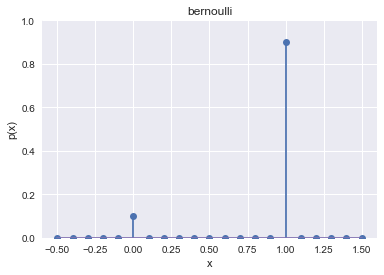

In [2]:
x = np.linspace(-0.5,1.5,21)
#p = stats.bernoulli.pmf(x, 0.8)
p = stats.bernoulli.pmf(x, 0.9)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(x, p)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.set_ylim(0,1)
ax.set_title('bernoulli')
ax.grid(True)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


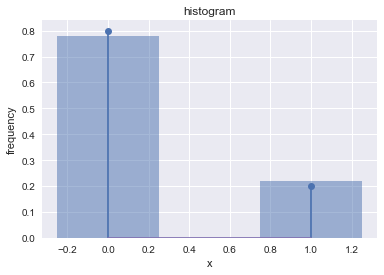

In [3]:
xs = stats.bernoulli.rvs(p=0.2, size=100)

x = np.linspace(0,1,2)
p = stats.bernoulli.pmf(x, 0.2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(xs, bins=np.linspace(-0.5,1.5,3), alpha=0.5, normed=True, rwidth=0.5)
ax.stem(x, p)
ax.set_xlabel('x')
ax.set_ylabel('frequency')
ax.set_title('histogram')
ax.grid(True)
plt.show()

# 一様分布

pdfで何もParameterを指定しない場合は、区間が[0,1]になる。</br>
<br>位置と区間はloc,scaleで指定する。loc, scaleを指定すると区間[loc, loc+scale]で確率が一定になり、</br>
pdfにより出力される値は1/scaleになる。

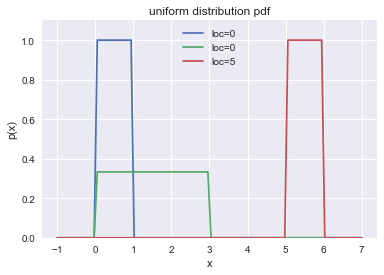

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-1,7,100)
ax.plot(x, stats.uniform.pdf(x,loc=0, scale=1), label='loc=0')
ax.plot(x, stats.uniform.pdf(x,loc=0, scale=3), label='loc=0')
ax.plot(x, stats.uniform.pdf(x,loc=5, scale=1), label='loc=5')
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.set_ylim(0,1.1)
ax.grid(True)
ax.legend(loc='best',frameon=False)
ax.set_title('uniform distribution pdf')
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


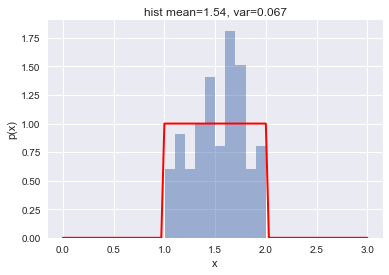

In [5]:
xs = stats.uniform.rvs(loc=1,scale=1,size=100)
x = np.linspace(0,3,100)
p = stats.uniform.pdf(x,loc=1,scale=1)
v = np.var(xs)
m = np.mean(xs)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(xs, bins=10, alpha=0.5, normed=True)
ax.plot(x,p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.set_title('hist mean=%.2f, var=%.3f' % (m,v))
ax.grid(True)
plt.show()

# ガウス分布(d=1)

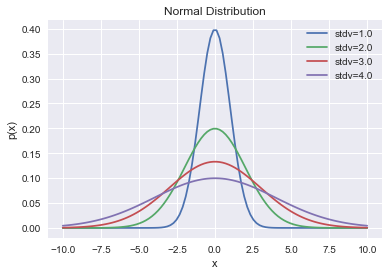

In [6]:
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
fig = plt.figure()
ax = fig.add_subplot(111)

for s in stdvs:
    ax.plot(x, stats.norm.pdf(x,scale=s), label='stdv=%.1f' % s)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=False)
ax.grid(True)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


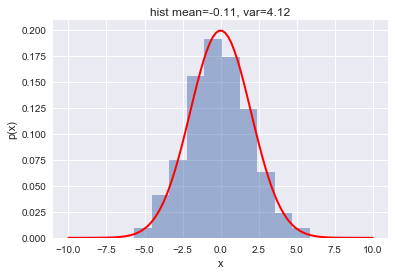

In [7]:
xs = stats.norm.rvs(scale=2,size=1000)
x = np.linspace(-10,10,100)
p = stats.norm.pdf(x,scale=2)
v = np.var(xs)
m = np.mean(xs)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(xs, bins=10, alpha=0.5, normed=True)
ax.plot(x,p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.set_title('hist mean=%.2f, var=%.2f' % (m,v))
ax.grid(True)
plt.show()

# ガウス分布(d=2)

多次元の時はscipy.stats.multivariate_normalを使う。
PDFの式は下記のようになる。
<br>p(x)=1(2π)D/2|Σ|exp(−12(x−μ)TΣ−1(x−μ))</br>

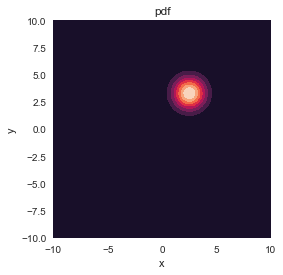

In [8]:
x,y = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
pos = np.dstack((x,y))
mean = np.array([2.5, 3.3])
cov  = np.array([[1.0,0.0],[0.0,1.0]])
z = stats.multivariate_normal(mean,cov).pdf(pos)

fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.contourf(x,y,z)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('pdf')
plt.show()

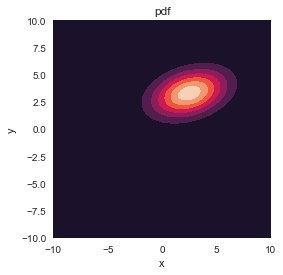

In [9]:
x,y = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
pos = np.dstack((x,y))
mean = np.array([2.5, 3.3])
cov  = np.array([[5.0,1.0],[1.0,2.0]])
z = stats.multivariate_normal(mean,cov).pdf(pos)

fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.contourf(x,y,z)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('pdf')
plt.show()

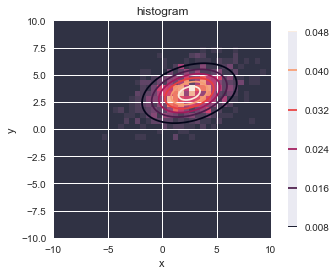

In [28]:
mean = np.array([2.5, 3.3])
cov  = np.array([[5.0,1.0],[1.0,2.0]])
mvn = stats.multivariate_normal(mean,cov)
ys = mvn.rvs(size=1000)

x,y = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
pos = np.dstack((x,y))
z = mvn.pdf(pos)

fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
H = ax.hist2d(ys[:,0],ys[:,1], bins=[np.linspace(-10,10,41),np.linspace(-10,10,41)],alpha=0.8)
cntr = ax.contour(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('histogram')
plt.colorbar(cntr, ax=ax, shrink=0.9)
plt.show()

# ガウス分布(d=3)

In [27]:
from mayavi import mlab

x = np.linspace(2.0,5.0,30)
y = np.linspace(2.0,5.0,30)
z = np.linspace(2.0,5.0,30)
X,Y,Z=np.meshgrid(x,y,z)
pos = np.vstack((X.flatten(),Y.flatten(),Z.flatten())).T

mean = np.array([2.5, 3.3, 2.0])
cov  = np.diag([0.5,2.5,1.0])
p = stats.multivariate_normal(mean,cov).pdf(pos)
figure = mlab.figure('3d gaussian pdf')
pts = mlab.points3d(pos[:,0], pos[:,1], pos[:,2], p, scale_mode='none')
mlab.axes()
mlab.show()

ModuleNotFoundError: No module named 'mayavi'

# Truncated Normal Distribution 

範囲は[a, b] * stdv

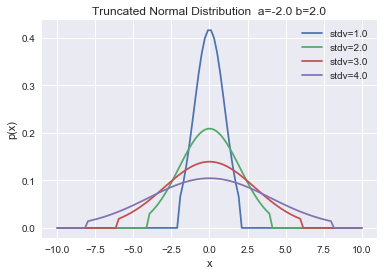

In [29]:
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
a = -2
b = 2
fig = plt.figure()
ax = fig.add_subplot(111)

for s in stdvs:
    ax.plot(x, stats.truncnorm.pdf(x,a, b, scale=s), label='stdv=%.1f' % s)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.set_title('Truncated Normal Distribution  a=%.1f b=%.1f' % (a,b))
ax.legend(loc='best', frameon=False)
ax.grid(True)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


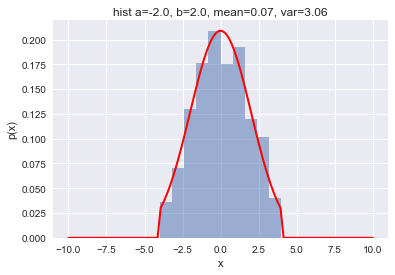

In [30]:
a = -2
b = 2
xs = stats.truncnorm.rvs(a, b, scale=2,size=1000)
x = np.linspace(-10,10,100)
p = stats.truncnorm.pdf(x, a, b, scale=2)
v = np.var(xs)
m = np.mean(xs)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(xs, bins=10, alpha=0.5, normed=True)
ax.plot(x,p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.set_title('hist a=%.1f, b=%.1f, mean=%.2f, var=%.2f' % (a,b,m,v))
ax.grid(True)
plt.show()

# Gamma分布

f(x|α,β)=βα * x^(α−1) * e^(−βx) / Γ(α)

確率密度分布はgamma.pdfで取得する。aはShape parameterで、β(b)はscale parameterを表す。

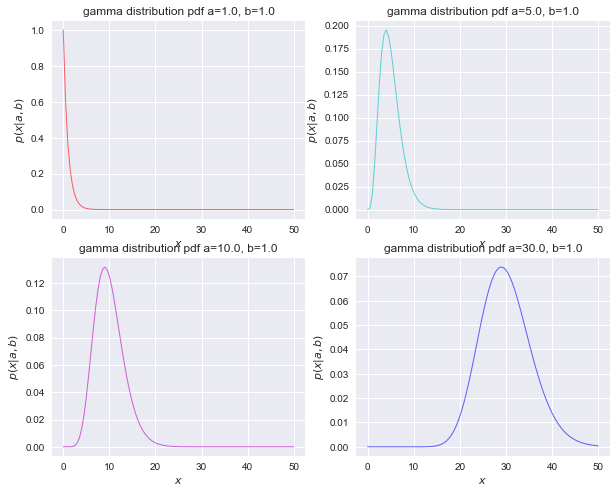

In [32]:
from scipy.stats import gamma

x = np.linspace(0,50,100)
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,8))
b = 1.0

a = 1.0
axes[0,0].plot(x,gamma.pdf(x,a,scale=1./b),'r-', lw=1,alpha=0.6,label='$a=%.1f, b=%.1f$' %(a,b))
axes[0,0].set_xlabel('$x$')
axes[0,0].set_ylabel('$p(x|a,b)$')
axes[0,0].set_title('gamma distribution pdf a=%.1f, b=%.1f' % (a,b))
axes[0,0].grid(True)
a = 5.0
axes[0,1].plot(x,gamma.pdf(x,a,scale=1./b),'c-', lw=1,alpha=0.6,label='$a=%.1f, b=%.1f$' %(a,b))
axes[0,1].set_xlabel('$x$')
axes[0,1].set_ylabel('$p(x|a,b)$')
axes[0,1].set_title('gamma distribution pdf a=%.1f, b=%.1f' % (a,b))
axes[0,1].grid(True)
a = 10.0
axes[1,0].plot(x,gamma.pdf(x,a,scale=1./b),'m-', lw=1,alpha=0.6,label='$a=%.1f, b=%.1f$' %(a,b))
axes[1,0].set_xlabel('$x$')
axes[1,0].set_ylabel('$p(x|a,b)$')
axes[1,0].set_title('gamma distribution pdf a=%.1f, b=%.1f' % (a,b))
axes[1,0].grid(True)
a = 30.0
axes[1,1].plot(x,gamma.pdf(x,a,scale=1./b),'b-', lw=1,alpha=0.6,label='$a=%.1f, b=%.1f$' %(a,b))
axes[1,1].set_xlabel('$x$')
axes[1,1].set_ylabel('$p(x|a,b)$')
axes[1,1].set_title('gamma distribution pdf a=%.1f, b=%.1f' % (a,b))
axes[1,1].grid(True)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


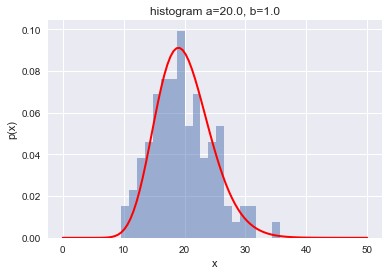

In [33]:
a = 20.0
b = 1.0

xs = gamma.rvs(a,scale=1.0/b,size=100)

x = np.linspace(0,50,100)
p = gamma.pdf(x,a,scale=1.0/b)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(xs, bins=20, alpha=0.5, normed=True)
ax.plot(x,p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('p(x)')
ax.set_title('histogram a=%.1f, b=%.1f' % (a,b))
ax.grid(True)
plt.show()